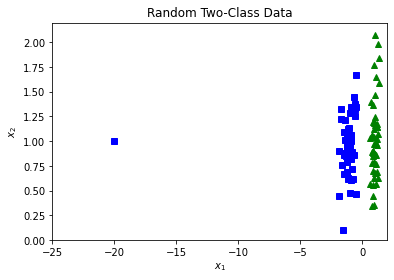

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

x, t = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

##############################
x = np.vstack((x, [-20, 1]))
t = np.append(t, 1)
##############################

plt.plot(x[:, 0][t==0], x[:, 1][t==0], "g^")
plt.plot(x[:, 0][t==1], x[:, 1][t==1], "bs")
plt.xlim([-25, 2])
plt.ylim([0, 2.2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Random Two-Class Data")
plt.show()

In [131]:
n = x.shape[0]

column = np.ones((n, 1))
x_tilde = np.append(column, x, 1)

t_trans = np.reshape(t, (n,1))
T = np.append(-t_trans+1, t_trans, 1)

w_tilde = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x_tilde), x_tilde)),
                              np.transpose(x_tilde)), T)

print(w_tilde)

[[ 0.40695632  0.59304368]
 [ 0.12025331 -0.12025331]
 [ 0.12174488 -0.12174488]]


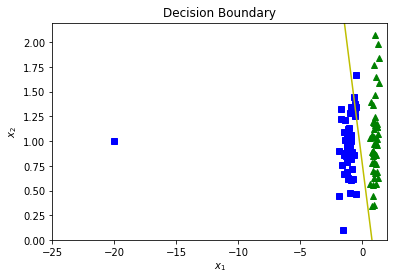

In [136]:
x1 = np.arange(min(x[:,0]), max(x[:,0]),0.01)
x2 = np.zeros(x1.size)

#####################################
w_tilde_sub = w_tilde[:,0]-w_tilde[:,1]
for i in range(x1.size):
  x2[i] = (w_tilde_sub[1] * -x1[i] - w_tilde_sub[0])/w_tilde_sub[2]
#####################################

plt.plot(x[:, 0][t==0], x[:, 1][t==0], "g^")
plt.plot(x[:, 0][t==1], x[:, 1][t==1], "bs")
plt.xlim([-25, 2])
plt.ylim([0, 2.2])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title('Decision Boundary')
plt.plot(x1, x2, 'y-')
plt.show()